# Assignment 1
Initial condition : $x(0)$ = 2 cm, $\dot{x}(0)$ = 0 for the values of the damping factor $\zeta$ = 0.1, 1 and 2. Let the frequency of undamped oscillation have the value $\omega_n$ = 5 rad/s and plot the response over the interval $0 \le s \le 5$ s.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [11]:
omega_n = 5  # natural frequency in rad/s
x0=0.02  # initial displacement in m
v0=0.0   # initial velocity in m/s
t=np.linspace(0,5,500)  # time vector from 0 to 5 seconds
zeta_values = [0.1, 1, 2]  # damping ratios to consider

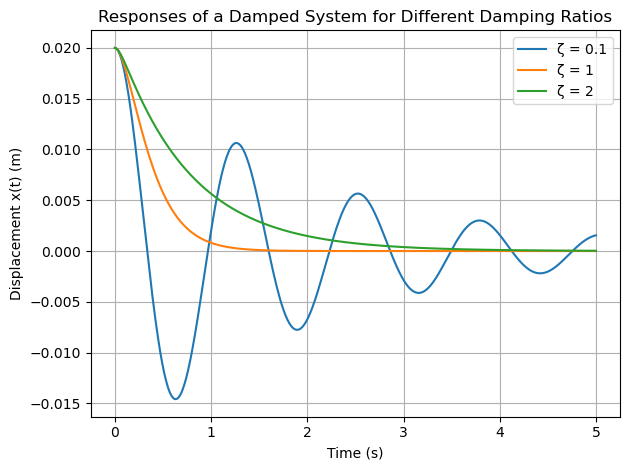

In [12]:
# For underdamped case (zeta < 1)   
from numpy import arctan2, exp, sin, cos, cosh, sinh 
for zeta in zeta_values:
    # For underdamped case (zeta < 1)       
    if zeta < 1:
        omega_d = omega_n * np.sqrt(1 - zeta**2)
        C = np.sqrt(x0**2 + ((v0 + zeta * omega_n * x0) / omega_d)**2)
        phi = arctan2((v0 + zeta * omega_n * x0),(omega_d * x0))
        x_t = C * exp(-zeta * omega_n * t) * cos(omega_d * t - phi)
    # For critically damped case (zeta = 1)
    elif zeta == 1:
        x_t = (x0 + (omega_n * x0 +v0) * t) * exp(-omega_n * t)
    # For overdamped case (zeta > 1)
    else:
        A = np.sqrt(zeta**2 - 1) * omega_n
        x_t = exp(-zeta * omega_n * t) * (x0 * cosh(A * t) + ((v0 + zeta * omega_n * x0) / A) * sinh(A * t)) 
    plt.plot(t, x_t, label=f'ζ = {zeta}')

# Formatting
plt.title('Responses of a Damped System for Different Damping Ratios')
plt.xlabel('Time (s)')
plt.ylabel('Displacement x(t) (m)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()